# MODELING EFFORTS

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import nltk
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# Labels as y

y = train_data.iloc[:, 0]

In [6]:
# Creating dictionary for mapping predictions

y_map = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'

}

In [7]:
# Get data points as matrix for training

train_data_f = np.array(train_data.loc[:, train_data.columns != 'label'])
train_data_f[np.isnan(train_data_f)] = 0

In [8]:
train_data_f.shape

(27455, 784)

In [9]:
# Normalizing Train Data - Subtracting mean and Dividing by SD
train_mean = np.mean(train_data_f)
train_sd = np.std(train_data_f)
train_norm = (train_data_f - train_mean)/train_sd

In [10]:
train_norm.shape

(27455, 784)

In [11]:
# x_train = train_norm.reshape(-1, 28, 28, 1)
x_train = train_norm.reshape((27455, 28,28))

In [12]:
x_train.shape

(27455, 28, 28)

In [13]:
x_train = x_train.reshape(-1, 28, 28, 1)

In [14]:
x_train.shape

(27455, 28, 28, 1)

In [15]:
# CNN Training libraries import

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(42)

In [16]:
def build_model():

    model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(128, (2,2), padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D((4, 4), strides=4),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='tanh', kernel_regularizer=l2()),      
      tf.keras.layers.Dense(units=25, activation='sigmoid')
    ])
    
    model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])
    print (model.summary)

    return model

In [17]:
y_train = to_categorical(y)

In [18]:
model = build_model()
history = model.fit(x_train, y_train, batch_size=32, epochs = 10)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fa79e4a1be0>>
Epoch 1/10
858/858 [==============================] - 43s 48ms/step - loss: 1.3070 - auc: 0.9641 - precision: 0.0856 - recall: 0.9891 - accuracy: 0.8127
Epoch 2/10
858/858 [==============================] - 39s 45ms/step - loss: 0.7292 - auc: 0.9870 - precision: 0.0878 - recall: 1.0000 - accuracy: 0.9213
Epoch 3/10
858/858 [==============================] - 38s 44ms/step - loss: 0.6460 - auc: 0.9799 - precision: 0.0884 - recall: 1.0000 - accuracy: 0.9354
Epoch 4/10
858/858 [==============================] - 38s 44ms/step - loss: 0.6219 - auc: 0.9733 - precision: 0.0890 - recall: 1.0000 - accuracy: 0.9381
Epoch 5/10
858/858 [==============================] - 38s 44ms/step - loss: 0.6070 - auc: 0.9681 - precision: 0.0889 - recall: 1.0000 - accuracy: 0.9404
Epoch 6/10
858/858 [==============================] - 38s 44ms/step - loss: 0.5939 - auc: 0.9634 - precision: 0.0894 - recall: 1.0000 - accur

In [19]:
# Testing - X Test Normalization

# Labels as y

y = test_data.iloc[:, 0]

# Get data points as matrix for training

test_data_f = np.array(test_data.loc[:, test_data.columns != 'label'])
test_data_f[np.isnan(test_data_f)] = 0

# Normalizing Train Data - Subtracting mean and Dividing by SD
test_mean = np.mean(test_data_f)
test_sd = np.std(test_data_f)
test_norm = (test_data_f - test_mean)/test_sd

# Reshaping data
x_test = test_norm.reshape((7172, 28,28))
x_test = test_norm.reshape(-1, 28, 28, 1)

In [20]:
x_test.shape

(7172, 28, 28, 1)

In [21]:
y_pred = model.predict(x_test)

225/225 [==============================] - 2s 9ms/step


In [22]:
y_pred_act = [];

for i in y_pred:
  ind_max = np.argmax(i)
  y_pred_act.append(ind_max)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_pred_act)

0.8912437255995538

In [24]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################

print(history.history.keys())
train_loss = history.history['loss']
train_auc = history.history['auc']
train_acc = history.history['accuracy']
train_recall = history.history['recall']
train_prec = history.history['precision']

dict_keys(['loss', 'auc', 'precision', 'recall', 'accuracy'])


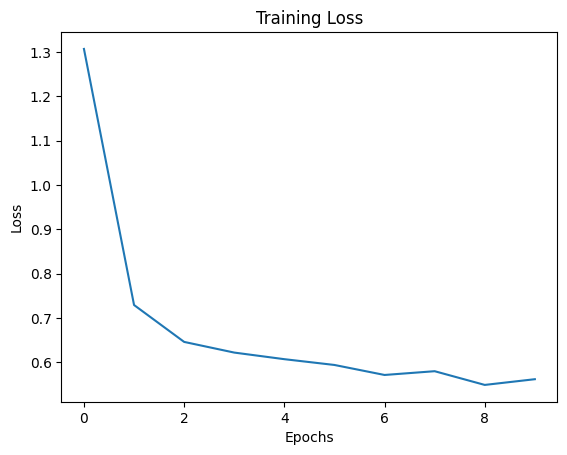

In [25]:
# Plot and label the =loss values
plt.plot(list(range(0,10)), train_loss)
 
# Add in a title and axes labels
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Display the plot
plt.show()

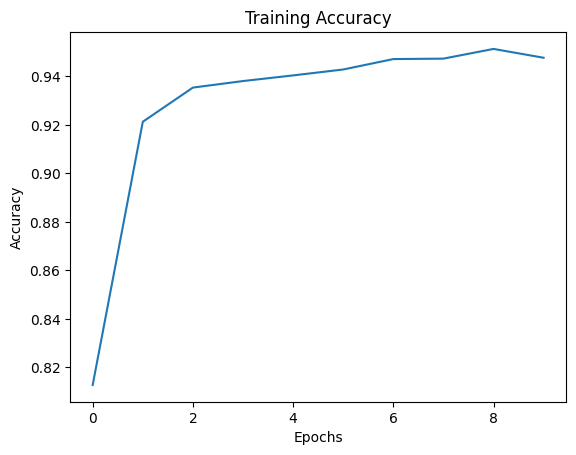

In [26]:
# Plot and label the accuracy values
plt.plot(list(range(0,10)), train_acc)
 
# Add in a title and axes labels
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

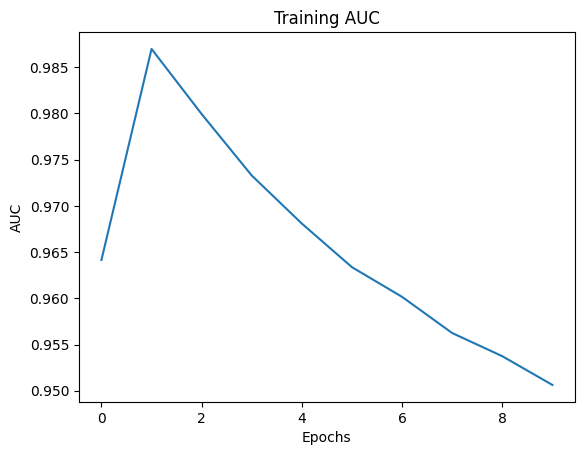

In [27]:
# Plot and label the AUC values
plt.plot(list(range(0,10)), train_auc)
 
# Add in a title and axes labels
plt.title('Training AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')

# Display the plot
plt.show()

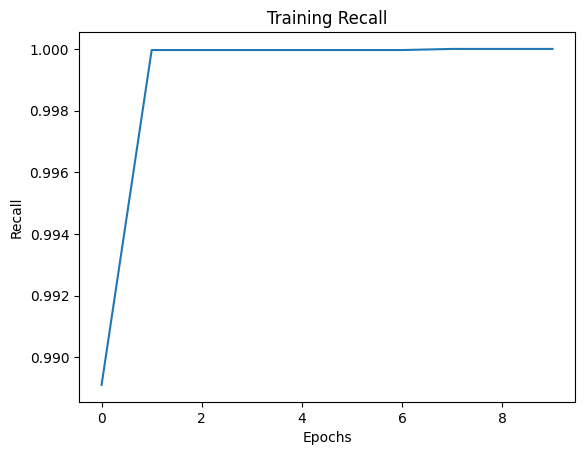

In [28]:
# Plot and label the Recall values
plt.plot(list(range(0,10)), train_recall)
 
# Add in a title and axes labels
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')

# Display the plot
plt.show()

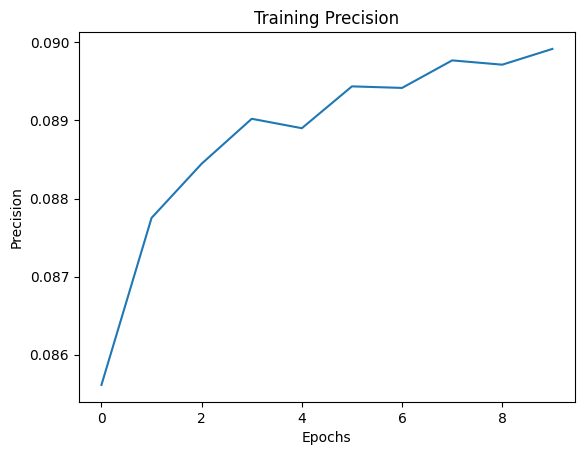

In [29]:
# Plot and label the Precision values
plt.plot(list(range(0,10)), train_prec)
 
# Add in a title and axes labels
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')

# Display the plot
plt.show()

In [39]:
# Creating pickle file from model
import pickle

def pickle_model(model):
  pickle.dump(model, open('pred_model.sav', 'wb'))  

In [40]:
pickle_model(model)

## BUILDING THE USER INTERFACE

In [30]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 15.0 MB/s eta 0:00:00
  Preparing meta

In [31]:
import gradio as gr

In [32]:
pos = 80
img = np.array(test_data[pos:pos+1].loc[:, test_data.columns != 'label'])
img = img.reshape(28, 28)

In [34]:
# Check results
print("Actual Label associated with sign is : ", y_map[int(np.array(test_data[pos:pos+1].loc[:, test_data.columns == 'label']))])

Actual Label associated with sign is :  R


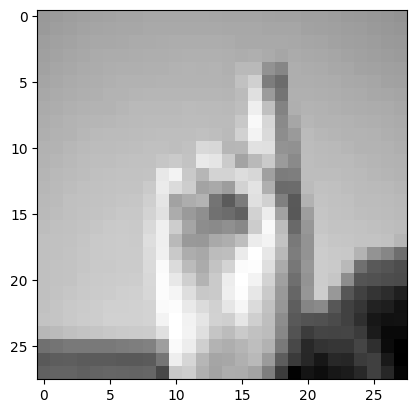

In [35]:
plt.imshow(img, cmap = 'gray')

# # for saving the matrix itself
from PIL import Image

im = Image.fromarray(img.astype(np.uint8))
im.save("sign_img.png")

In [36]:
import imageio.v3 as iio

im = iio.imread('sign_img.png')
print(im.shape)

(28, 28)


In [37]:
# img = tf.image.resize(img, (28, 28))
img = np.array(img).flatten()

# # Reshaping data
new_img = (img - test_mean)/test_sd

# Reshaping data
img_test = new_img.reshape((1, 28,28))
img_cnn_test = new_img.reshape(-1, 28, 28, 1)

# # # Run prediction

y_pred = model.predict(img_cnn_test)
ind_max = np.argmax(y_pred)

# # Return prediction
print('prediction', ind_max, 'confidence', str(y_pred[0][ind_max]))

1/1 [==============================] - 0s 153ms/step
prediction 17 confidence 0.9999931


In [43]:
# Define function to retrain on iterative new data with high confidence levels

def rebuild_model(file, img, pred, conf):
  
  if conf > 0.99:
    model = pickle.load(open('pred_model.sav', 'rb'))
    model.fit(img, pred)
    pickle_model(model)

In [45]:
# Define function to run prediction on image
def classify_image(img):
  try:
    img = tf.image.resize(img, (28, 28))
    img = np.mean(img, axis=2)
    img = np.array(img).flatten()

    # # Reshaping data
    new_img = (img - test_mean)/test_sd

    # Reshaping data
    # img_test = new_img.reshape((1, 28,28))
    img_cnn_test = new_img.reshape(-1, 28, 28, 1)

    # # # Run prediction
    model = pickle.load(open('pred_model.sav', 'rb'))
    y_pred = model.predict(img_cnn_test)
    ind_max = np.argmax(y_pred)
    y_val = y_map[ind_max]
    rebuild_model('pred_model.sav', img_cnn_test, y_pred, y_pred[0][ind_max])
    
    return 'Prediction : ' + str(y_val) + ' with Confidence : ' + str(y_pred[0][ind_max])
    # return str(ind_max)

  except Exception as e:
    return str(e)

In [47]:
# Create interface
inputs = gr.inputs.Image()
outputs = gr.outputs.Label(num_top_classes=1)
interface = gr.Interface(fn=classify_image, inputs=inputs, outputs=outputs)

# Launch interface
interface.launch(share=True, inbrowser=True, debug=True)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://47e825ab1b03195ff4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 1s 1s/step - loss: 85.7198 - auc: 0.0000e+00 - precision: 1.0000 - recall: 0.4400 - accuracy: 0.0000e+00


1/1 [==============================] - 1s 1s/step - loss: 96.8222 - auc: 0.0000e+00 - precision: 1.0000 - recall: 0.4400 - accuracy: 1.0000
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9572a7bafca1332ad7.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://233e1219ef57ae5832.gradio.live
Killing tunnel 127.0.0.1:7862 <> https://47e825ab1b03195ff4.gradio.live
